## Classification model using KNN for Parkinson's disease (PD) dataset
#### https://archive.ics.uci.edu/ml/datasets/parkinsons

### Importing relevant libraries

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

## 1. Loading the dataset

In [421]:
parkinson_data = pd.read_csv("/Users/pruchika/Downloads/parkinsons.data")

In [422]:
parkinson_data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2. Data Pre-processing

In [423]:
parkinson_data.describe

<bound method NDFrame.describe of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     

In [424]:
#Checking if data contains missing values

print("Null Values Check\n")
print(parkinson_data.isnull().sum())
print("\n\n NAN Values Check \n")
print(parkinson_data.isna().sum())

Null Values Check

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


 NAN Values Check 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0


In [425]:
parkinson_data.isnull().values.any()

False

#### * There are no missing values in the Data

In [426]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### *Data types look fine - float, int
#### *No label encoding required

In [427]:
#Counting total number of rows in dataset

numRows = parkinson_data.count(axis=0)[0]
print("Total no. of rows in the data: ", numRows)

Total no. of rows in the data:  195


In [428]:
numPatients = parkinson_data[parkinson_data["status"] == 1].status.count()
print("Number of patients with Parkinsons:\n", numPatients)
print("Percentage of patients with Parkinsons:\n", round((numPatients * 100)/numRows))

Number of patients with Parkinsons:
 147
Percentage of patients with Parkinsons:
 75


#### *Dataset is a fairly skewed towards Parients with Parkinsons
#### *No outliers were found in this dataset.

### Creating the Training and Testing Datasets (using 70:30 split)

In [429]:
# Dropping the a few column as they has no impact on the status
parkinson_data.drop(columns ='name',inplace=True)
parkinson_data.drop(columns ='Shimmer:DDA',inplace=True)
parkinson_data.drop(columns ='Jitter:DDP',inplace=True)
parkinson_data.drop(columns ='MDVP:RAP',inplace=True)

In [430]:
parkinson_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00554,0.04374,0.426,0.02182,0.03130,0.02971,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00696,0.06134,0.626,0.03134,0.04518,0.04368,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00781,0.05233,0.482,0.02757,0.03858,0.03590,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00698,0.05492,0.517,0.02924,0.04005,0.03772,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00908,0.06425,0.584,0.03490,0.04825,0.04465,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [431]:
# splitting into inputs and outputs

X = parkinson_data.drop('status', axis=1) # X axis without the Target Variable
y = parkinson_data['status'] # target variable on y Axis
cols = X.columns
print(X.shape,y.shape)

(195, 19) (195,)


In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [433]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
49,122.964,130.049,114.676,0.00428,0.00003,0.00155,0.01681,0.154,0.00930,0.00802,0.01400,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
180,150.440,163.441,144.736,0.00396,0.00003,0.00233,0.02551,0.237,0.01321,0.01574,0.02148,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
102,139.224,586.567,66.157,0.03011,0.00022,0.01628,0.09419,0.930,0.05551,0.05005,0.06023,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,224.429,168.793,0.03107,0.00016,0.01958,0.11908,1.302,0.05647,0.07940,0.13778,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
91,151.955,163.335,147.226,0.00419,0.00003,0.00227,0.07959,0.772,0.04421,0.04962,0.05690,0.01658,19.664,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120


In [434]:
# Scaling the training data and test data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(train_scaled)
X_test_scaled = pd.DataFrame(test_scaled)

# Replacing the Columns Headers back
X_train_scaled.columns = cols
X_test_scaled.columns = cols

In [435]:
X_test_scaled.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.154356,0.353065,0.225707,0.389492,0.510490,0.464082,0.296524,0.338356,0.388685,0.280234,0.208732,0.060690,0.480101,0.722095,0.967466,0.707257,0.512593,0.002949,0.647087
1,0.187568,0.060560,0.278139,0.447173,0.510490,0.726340,0.507653,0.483562,0.548624,0.603837,0.299824,0.065446,0.465545,0.393983,0.999097,0.789019,0.708013,0.227240,0.750557
2,0.381407,0.132722,0.001762,0.374072,0.300699,0.384265,0.380203,0.308219,0.346483,0.365513,0.401988,0.224938,0.267228,1.000000,0.500363,0.821926,0.615739,0.575241,0.769601
3,0.515165,0.236146,0.106423,0.157053,0.160839,0.123147,0.002432,0.019178,0.000000,0.000000,0.030700,0.061774,0.764311,0.355634,0.302880,0.684524,0.663846,0.522320,0.443083
4,0.230934,0.074940,0.325883,0.143347,0.160839,0.060433,0.163782,0.146575,0.241284,0.092160,0.102793,0.020832,0.636608,0.503515,0.756433,0.157425,0.509368,0.091568,0.154275


In [436]:
numRows = X_train_scaled.count(axis=0)[0]
print("Total number of rows in training data set: ", numRows)
numRows = X_test_scaled.count(axis=0)[0]
print("Total number of rows in testing data set: ", numRows)

Total number of rows in training data set:  136
Total number of rows in testing data set:  59


## 3. Data Modeling

### Training the model using KNN

In [437]:
error_rate = []

for i in range(1,100):
 NNH = KNeighborsClassifier(n_neighbors=i)
 NNH.fit(X_train_scaled,y_train)
 KNN_predicted = NNH.predict(X_test_scaled)
 error_rate.append(np.mean(KNN_predicted != y_test))

Text(0, 0.5, 'Error Rate')

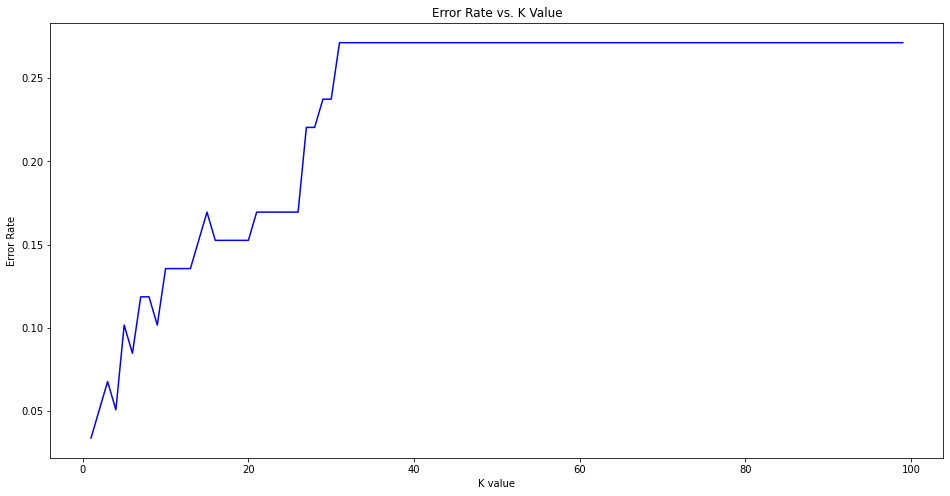

In [438]:
plt.figure(figsize=(16,8))
plt.plot(range(1,100),error_rate,color= 'blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

#### *Selecting K = 4 for KNN as 4 is the first sharp point

#### Using Euclidean Distance Metric

In [439]:
K = 4
NNH = KNeighborsClassifier(n_neighbors=K, metric = 'minkowski', p = 2)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [440]:
#Predicting using the test data and scoring the results

KNN_predicted = NNH.predict(X_train_scaled)
train_acc = metrics.accuracy_score(y_train, KNN_predicted)
print("KNN classifier model accuracy with training data: {0:.4f}".format(metrics.accuracy_score(y_train,KNN_predicted)*100))
print()

KNN_predicted = NNH.predict(X_test_scaled)
test_acc = metrics.accuracy_score(y_test, KNN_predicted_labels)
print("KNN classifier model accuracy with testing data: {0:.4f}".format(metrics.accuracy_score(y_test,KNN_predicted)*100))
print()

KNN classifier model accuracy with training data: 94.8529

KNN classifier model accuracy with testing data: 94.9153



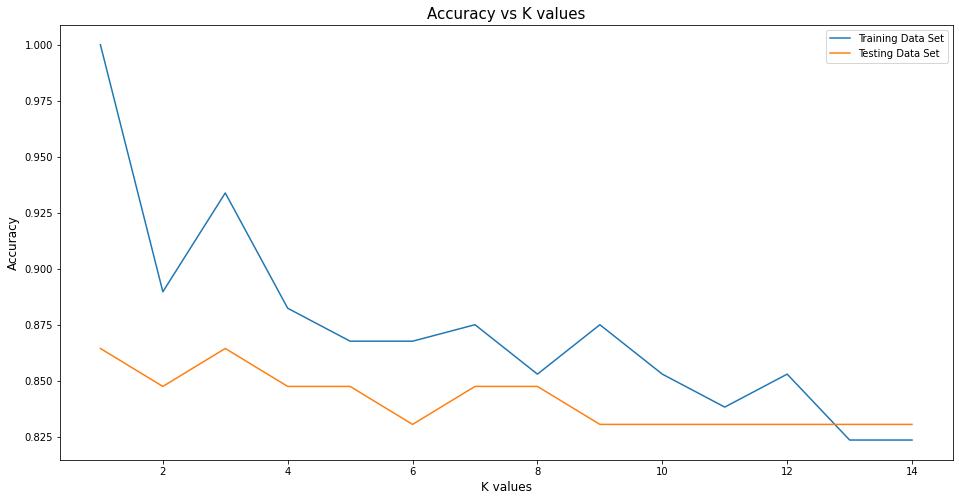

In [441]:
n_neighbors = range(1, 15)
train_data_accuracy = []
test_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test_data_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(16,8))
plt.plot(n_neighbors, train_data_accuracy, label="Training Data Set")
plt.plot(n_neighbors, test_data_accuracy, label="Testing Data Set")
plt.title("Accuracy vs K values",size='15')
plt.ylabel("Accuracy",size='12')
plt.xlabel("K values",size='12')
plt.legend()
plt.show()

## Future scope of the work

#### We can apply hyper parameter optimisation by using GridSearch and finding better hyper-parameters in KNN’s case.
#### We can try to get more data related to these patients that can be used to do feature engineering and thus get a better accuracy.
#### We can build this into an application and provide it to healthcare so that doctors can put the data and get the probability that the patient has parkinson’s disease. There we can also add better scans and use computer vision based models to get even better performance.